# This is a work in progress, to be continued.


- data types: The data hierarchy, the concrete vs. abstract types

- struct: composite types; used to organize data and give them types

- method and multiple dispatch: how to do things depend on data types




## Data Types

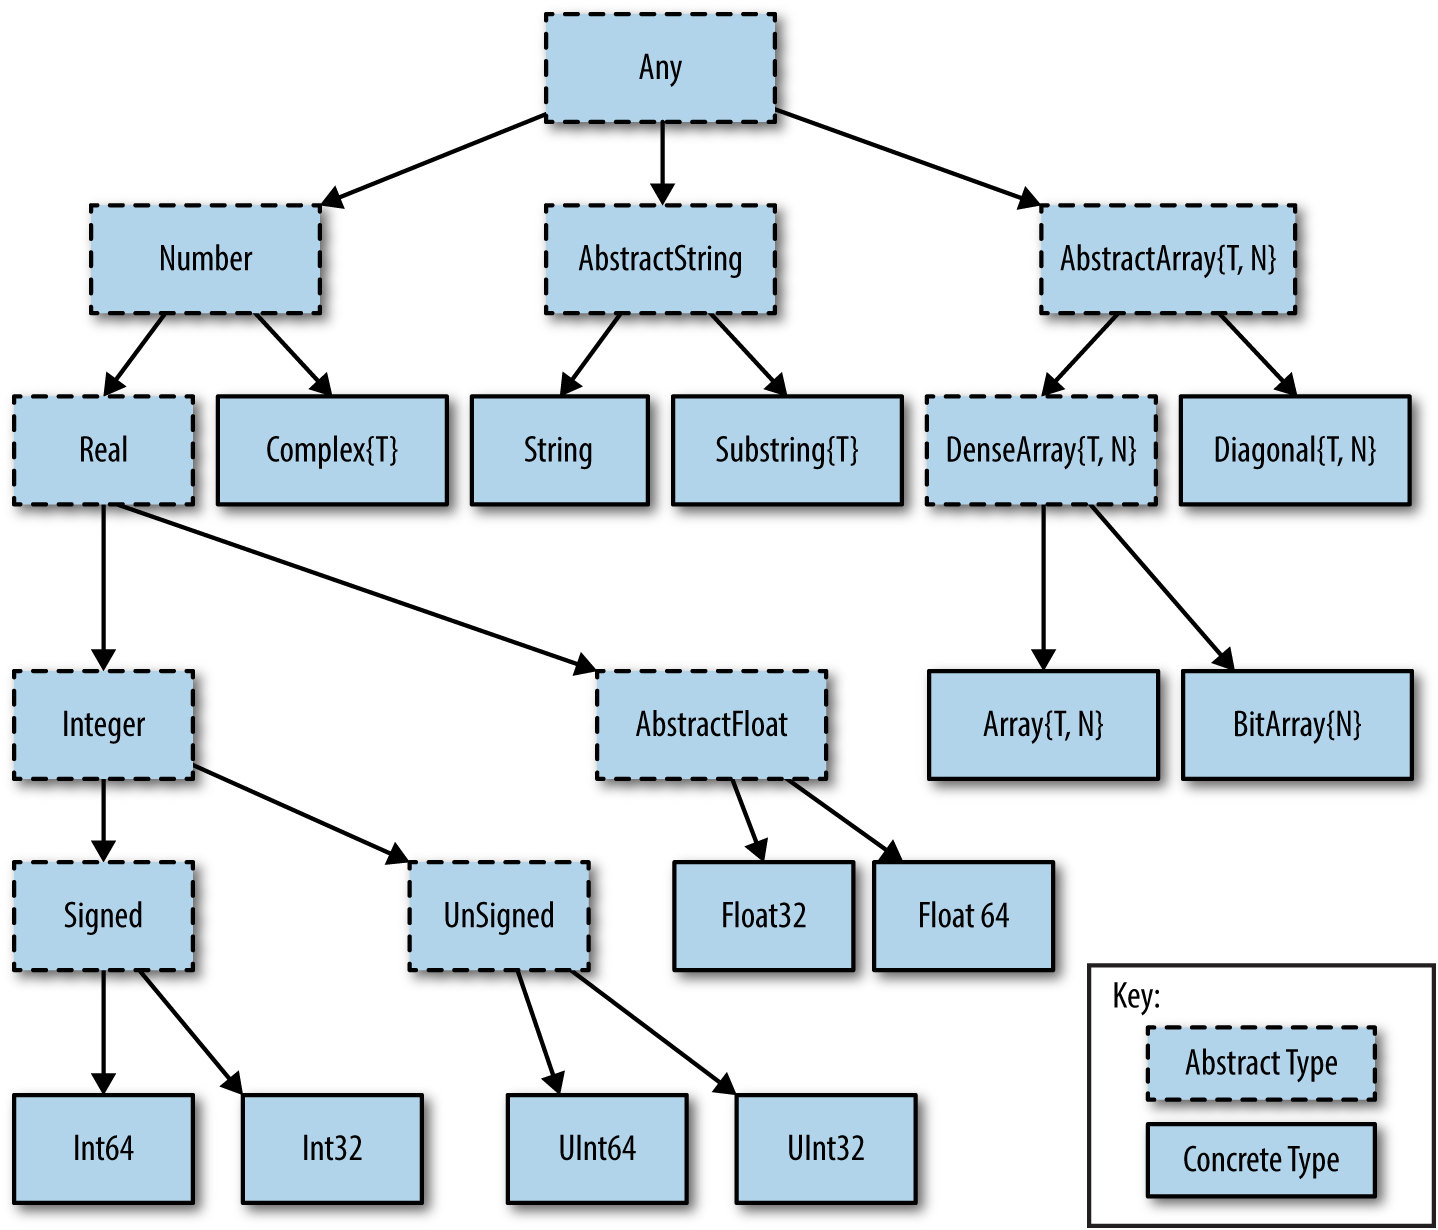

## `struct`

In [3]:
## Examples of "struct" ("types", "classes", for structured data)
##   Organize data, give them certain types.


struct theSimplest  # accept any type, string, Float64, Int64, etc.
    x
    y
end

aa = theSimplest(1.2, "haha")

@show typeof(aa.x);
@show aa.x;

@show typeof(aa.y);
@show aa.y;    

typeof(aa.x) = Float64
aa.x = 1.2
typeof(aa.y) = String
aa.y = "haha"


In [4]:
struct test{T} <: Real  # "<: Real" means the whole struct would be a sub-type of Real
    ss::T                # test1{T}: "T" could be any type (Float64, Int64, etc.).
    pp::T                # ss and pp have the same type. E.g, both are Float64, etc.  
end


struct register{S1, S2}  # Does not need not be "T", could be any such as S. 
    學校::S1             # Allow each field to have different types. 可加身高。
    姓名::S2             # Most flexible, but compiled code is less efficient
end


struct example    # Mixed types. This does not work: struct example
    x1::Float64   #                                          x1::T   
    y1::Int64     #                                          y1::T
end               #                                   end     

struct register2   # work exactly the same as "register"
    學校          
    姓名
end

In [6]:
aa = test(2.2, 1.0)  # show also: (3,2) (integer), ("yes", "no") (string)

@show typeof(aa);
@show typeof(aa.ss);  # call the value by the field name
@show aa.ss;
@show typeof(aa.pp);  # call the value by the field name
@show aa.pp;

bb = test("string also work, ", "that's great")
println("")
@show bb;
@show typeof(bb.ss);
@show bb.ss;

# cc = test(2.2, 1)  # why this does not work? Because the _____ are of different ____


typeof(aa) = test{Float64}
typeof(aa.ss) = Float64
aa.ss = 2.2
typeof(aa.pp) = Float64
aa.pp = 1.0

bb = test{String}("string also work, ", "that's great")
typeof(bb.ss) = String
bb.ss = "string also work, "


In [12]:
aa = register("台大", "王大華")
bb = register("政大", "鄭中化")
cc = register(101,    "李小花")
@show aa;
@show typeof(aa.學校);
@show aa.學校;

&&&stop_here_for_a_moment

namelist = (aa, bb, cc)

for i in 1:length(namelist)
    display(namelist[i].學校)
end

"台大"

"政大"

101

aa = register{String, String}("台大", "王大華")
typeof(aa.學校) = String
aa.學校 = "台大"


In [7]:
struct test5{Float64}
    ss::Float64
end

@show aa = test5(1.1);
@show typeof(aa);


struct test6b{Float64} # does not work
    ss
end

# @show aa = test6b(1.1) # does not work


struct test7{Float64}  # does not work
    ss::Int64
end

# @show aa = test7(1)     # does not work
# @show aa = test7(1.1)   # does not work

struct test8
    ss::Float64
end

@show bb = test8(1.2);
@show typeof(bb);

struct test9{Float64}
    ss::Float64
end

@show cc = test9(1.2);
@show typeof(cc);

@show typeof(1.2);

struct test10{T} 
    ss::T
end

dd = test10(10);
ee = test10(1.0);

@show typeof(dd);
@show typeof(ee);

aa = test5(1.1) = test5{Float64}(1.1)
typeof(aa) = test5{Float64}
bb = test8(1.2) = test8(1.2)
typeof(bb) = test8
cc = test9(1.2) = test9{Float64}(1.2)
typeof(cc) = test9{Float64}
typeof(1.2) = Float64
typeof(dd) = test10{Int64}
typeof(ee) = test10{Float64}


## Methods: The ways that Julia do things; often depend on data types.

Do you know that the simple arithmetic of `1.0 + 1.0` and `1.0 + 1` are treated differently in Julia? It is because the former is the sum of two `double`s while the latter is the sum of a `double` and an `integer`. They require different computer codes (i.e., different _**methods**_) to do the job. Which method to use often depends on the types of the data, such as `Float64`, `Int64`, or any user-defined types.

If you define your own types of data, you can also define the methods on how they should work in arithmetic.

`struct` is a good way to define your own data type, as we have seen above.

In [1]:
methods(+)

# 208 methods for generic function "+":
[1] +(x::T, y::T) where T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8} in Base at int.jl:87
[2] +(c::Union{UInt16, UInt32, UInt8}, x::BigInt) in Base.GMP at gmp.jl:529
[3] +(c::Union{Int16, Int32, Int8}, x::BigInt) in Base.GMP at gmp.jl:535
[4] +(c::Union{UInt16, UInt32, UInt8}, x::BigFloat) in Base.MPFR at mpfr.jl:390
[5] +(c::Union{Int16, Int32, Int8}, x::BigFloat) in Base.MPFR at mpfr.jl:398
[6] +(c::Union{Float16, Float32, Float64}, x::BigFloat) in Base.MPFR at mpfr.jl:406
[7] +(x::Union{Dates.CompoundPeriod, Dates.Period}) in Dates at C:\Users\King\.julia\juliaup\julia-1.7.2+0~x64\share\julia\stdlib\v1.7\Dates\src\periods.jl:372
[8] +(x::Rational, y::Integer) in Base at rational.jl:311
[9] +(A::LinearAlgebra.UpperTriangular, B::LinearAlgebra.UpperTriangular) in LinearAlgebra at C:\Users\King\.julia\juliaup\julia-1.7.2+0~x64\share\julia\stdlib\v1.7\LinearAlgebra\src\triangular.jl:636
[10] +(A::LinearAlgebra.UpperTriangular, B::LinearAlgebra.UnitUpperTriangular) in LinearAlgebra at C:\Users\King\.julia\juliaup\julia-1.7.2+0~x64\share\julia\stdlib\v1.7\LinearAlgebra\src\triangular.jl:638
[11] +(x::LinearAlgebra.UpperTriangular, H::LinearAlgebra.UpperHessenberg) in LinearAlgebra at C:\Users\King\.julia\juliaup\julia-1.7.2+0~x64\share\julia\stdlib\v1.7\LinearAlgebra\src\hessenberg.jl:107
[12] +(A::LinearAlgebra.UpperTriangular, B::LinearAlgebra.Bidiagonal) in LinearAlgebra at C:\Users\King\.julia\juliaup\julia-1.7.2+0~x64\share\julia\stdlib\v1.7\LinearAlgebra\src\special.jl:86
[13] +(Da::LinearAlgebra.Diagonal, Db::LinearAlgebra.Diagonal) in LinearAlgebra at C:\Users\King\.julia\juliaup\julia-1.7.2+0~x64\share\julia\stdlib\v1.7\LinearAlgebra\src\diagonal.jl:172
[14] +(D::LinearAlgebra.Diagonal, S::LinearAlgebra.Symmetric) in LinearAlgebra at C:\Users\King\.julia\juliaup\julia-1.7.2+0~x64\share\julia\stdlib\v1.7\LinearAlgebra\src\diagonal.jl:176
[15] +(D::LinearAlgebra.Diagonal{var"#s859", V} where {var"#s859"<:Real, V<:AbstractVector{var"#s859"}}, H::LinearAlgebra.Hermitian) in LinearAlgebra at C:\Users\King\.julia\juliaup\julia-1.7.2+0~x64\share\julia\stdlib\v1.7\LinearAlgebra\src\diagonal.jl:182
[16] +(x::LinearAlgebra.Diagonal, H::LinearAlgebra.UpperHessenberg) in LinearAlgebra at C:\Users\King\.julia\juliaup\julia-1.7.2+0~x64\share\julia\stdlib\v1.7\LinearAlgebra\src\hessenberg.jl:107
[17] +(A::LinearAlgebra.Diagonal, B::LinearAlgebra.Bidiagonal) in LinearAlgebra at C:\Users\King\.julia\juliaup\julia-1.7.2+0~x64\share\julia\stdlib\v1.7\LinearAlgebra\src\special.jl:125
[18] +(A::LinearAlgebra.Diagonal, B::LinearAlgebra.SymTridiagonal) in LinearAlgebra at C:\Users\King\.julia\juliaup\julia-1.7.2+0~x64\share\julia\stdlib\v1.7\LinearAlgebra\src\special.jl:135
[19] +(A::LinearAlgebra.Diagonal, B::LinearAlgebra.Tridiagonal) in LinearAlgebra at C:\Users\King\.julia\juliaup\julia-1.7.2+0~x64\share\julia\stdlib\v1.7\LinearAlgebra\src\special.jl:163
[20] +(A::LinearAlgebra.Diagonal{var"#s859", V} where {var"#s859"<:Number, V<:AbstractVector{var"#s859"}}, B::LinearAlgebra.UniformScaling) in LinearAlgebra at C:\Users\King\.julia\juliaup\julia-1.7.2+0~x64\share\julia\stdlib\v1.7\LinearAlgebra\src\special.jl:241
[21] +(A::LinearAlgebra.Bidiagonal, B::LinearAlgebra.Bidiagonal) in LinearAlgebra at C:\Users\King\.julia\juliaup\julia-1.7.2+0~x64\share\julia\stdlib\v1.7\LinearAlgebra\src\bidiag.jl:354
[22] +(x::LinearAlgebra.Bidiagonal, H::LinearAlgebra.UpperHessenberg) in LinearAlgebra at C:\Users\King\.julia\juliaup\julia-1.7.2+0~x64\share\julia\stdlib\v1.7\LinearAlgebra\src\hessenberg.jl:107
[23] +(A::LinearAlgebra.Bidiagonal, B::LinearAlgebra.UpperTriangular) in LinearAlgebra at C:\Users\King\.julia\juliaup\julia-1.7.2+0~x64\share\julia\stdlib\v1.7\LinearAlgebra\src\special.jl:94
[24] +(A::LinearAlgebra.Bidiagonal, B::LinearAlgebra.UnitUpperTriangular) in LinearAlgebra at C:\Users\King\.julia\juliaup\julia-1.7.2+0~x64\share\julia\stdlib\v1.7\LinearAlgebra\src\sp